In [36]:
%matplotlib inline

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
plt.style = "fivethirtyeight"

## Importing the Matches and Deliveries Data
- Analyze each of the csv separately
- Understand each of the feature, fill in empty values with appropriate information
- Optimize the memory utilization by casting the data structure for each of the feature 

In [2]:
matches_df = pd.read_csv("data/matches.csv")
deliveries_df = pd.read_csv("data/deliveries.csv")

In [3]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [7]:
deliveries_df["dismissal_kind"].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

### Observations so far!!
- Initial looks, deliveries information seems to be complete, however, I have to understand the logic of fielder feature. 
- Matches information is incomplete, features mentioned below are missing values
    - city (7)
    - winner (4 matches no result)
    - player of the match (4)
    - umpire1 (2)
    - umpire2 (2)
    - umpire3 (637)
- I believe we can convert most of the objects to categories to optimize the memory. 

### Matches Dataframe Analysis
- Understand each of the feature
- Optimize the memory utilization 
- Fill in missing columns

In [8]:
# Note: Bangalore and Bengaluru are separate Chandigarh and Mohali are separate (Categories) (7 NA values - Dubai)
matches_df.replace("Bengaluru", "Bangalore", inplace=True)
matches_df.replace("Mohali", "Chandigarh", inplace=True)
matches_df["city"].fillna("Dubai", inplace=True)
matches_df["city"] = matches_df["city"].astype("category")
matches_df["city"].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Dubai               7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Ranchi              7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [9]:
matches_df["date"] # can be converted to datetime format
matches_df["date"] = pd.to_datetime(matches_df["date"])
matches_df["date"].head()

0   2017-04-05
1   2017-04-06
2   2017-04-07
3   2017-04-08
4   2017-04-08
Name: date, dtype: datetime64[ns]

In [10]:
# Note: Rising Pune Supergiants repeated twice in complete df (Categories) 
matches_df.replace("Rising Pune Supergiants", "Rising Pune Supergiant", inplace=True)
matches_df["team1"] = matches_df["team1"].astype("category")
matches_df["team1"].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiant          15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [11]:
matches_df["team2"] = matches_df["team2"].astype("category")
matches_df["team2"].value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiant         15
Delhi Capitals                 10
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [12]:
matches_df["toss_winner"] = matches_df["toss_winner"].astype("category")
matches_df["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiant         13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

In [13]:
matches_df["toss_decision"] = matches_df["toss_decision"].astype("category")
matches_df["toss_decision"].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [14]:
matches_df["result"] = matches_df["result"].astype("category")
matches_df["result"].value_counts() # Should be converted to categries

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [15]:
# matches_df[matches_df["player_of_match"].isna()]  (4 no result matches fun fact 3 our of 4 no result matches RCB were part of)
matches_df["player_of_match"] = matches_df["player_of_match"].astype("category")
matches_df["player_of_match"].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
MF Maharoof        1
MD Mishra          1
MA Starc           1
M Ur Rahman        1
A Chandila         1
Name: player_of_match, Length: 226, dtype: int64

In [16]:
# matches_df[matches_df["winner"].isna()] only 752 values available (4 no result matches )
matches_df["winner"] = matches_df["winner"].astype("category")
matches_df["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [17]:
# Lot of duplicate entries with different spelling should clean this up! (categories) 
# Check if below values are actual duplicates by comparing the city column! 
# Rajiv Gandhi International Stadium, Uppal vs Rajiv Gandhi Intl. Cricket Stadium (Hyderabad)
# Punjab Cricket Association IS Bindra Stadium, Mohali vs Punjab Cricket Association Stadium, Mohali
# M. A. Chidambaram Stadium vs MA Chidambaram Stadium, Chepauk
# M Chinnaswamy Stadium vs M. Chinnaswamy Stadium
# Feroz Shah Kotla vs Feroz Shah Kotla Ground

matches_df.replace("Rajiv Gandhi Intl. Cricket Stadium", "Rajiv Gandhi International Stadium, Uppal", inplace=True)
matches_df.replace("Punjab Cricket Association Stadium, Mohali", "Punjab Cricket Association IS Bindra Stadium, Mohali", inplace=True)
matches_df.replace("M. A. Chidambaram Stadium", "MA Chidambaram Stadium, Chepauk", inplace=True)
matches_df.replace("Feroz Shah Kotla Ground", "Feroz Shah Kotla", inplace=True)
matches_df["venue"] = matches_df["venue"].astype("category")
matches_df["venue"].value_counts() 

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Punjab Cricket Association IS Bindra Stadium, Mohali    49
Sawai Mansingh Stadium                                  47
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Saurashtra Cricket Association Stadium                  

In [18]:
# umpire1 Only 754 values found (Categories)
matches_df.loc[4, "umpire1"] = "VK Sharma" # 2017-04-08 (index=4) u1 = Virender Sharma (https://www.espncricinfo.com/series/8048/scorecard/1082595/royal-challengers-bangalore-vs-delhi-daredevils-5th-match-indian-premier-league-2017)
matches_df.loc[753, "umpire1"] = "Bruce Oxenford" # 2019-08-05 (index=753) u1 = Bruce Oxenford (https://www.espncricinfo.com/series/8048/scorecard/1181766/delhi-capitals-vs-sunrisers-hyderabad-eliminator-indian-premier-league-2019)
matches_df["umpire1"] = matches_df["umpire1"].astype("category")
matches_df["umpire1"].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SL Shastri          1
Sundaram Ravi       1
Ulhas Gandhe        1
VK Sharma           1
A Nanda Kishore     1
Name: umpire1, Length: 62, dtype: int64

In [19]:
# umpire2 Only 754 values found (Categories)
matches_df.loc[4, "umpire2"] = "S Ravi" # 2017-04-08 (index=4) u2 = Sundaram Ravi (https://www.espncricinfo.com/series/8048/scorecard/1082595/royal-challengers-bangalore-vs-delhi-daredevils-5th-match-indian-premier-league-2017)
matches_df.loc[753, "umpire2"] = "S Ravi" # 2019-08-05 (index=753) u2 = Sundaram Ravi (https://www.espncricinfo.com/series/8048/scorecard/1181766/delhi-capitals-vs-sunrisers-hyderabad-eliminator-indian-premier-league-2019)
matches_df["umpire2"] = matches_df["umpire2"].astype("category")
matches_df["umpire2"].value_counts()

S Ravi                   59
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
SD Fry                    1
KN Ananthapadmanabhan     1
Nand Kishore              1
Ian Gould                 1
JD Cloete                 1
Name: umpire2, Length: 65, dtype: int64

In [20]:
# umpire 3 not very much concerned!
matches_df["umpire3"] = matches_df["umpire3"].astype("category") 
matches_df["umpire3"].value_counts() 

O Nandan                   10
Nitin Menon                10
C Shamshuddin              10
Anil Chaudhary              9
Vineet Kulkarni             8
S Ravi                      8
Yeshwant Barde              7
Anil Dandekar               7
Bruce Oxenford              7
Chris Gaffaney              6
Rod Tucker                  5
Marais Erasmus              5
Nigel Llong                 4
Ian Gould                   3
A Nanda Kishore             3
Nanda Kishore               3
K Ananthapadmanabhan        2
Virender Kumar Sharma       2
Ulhas Gandhe                2
A.D Deshmukh                2
Kumar Dharmasena            2
KN Anantapadmanabhan        1
KN Ananthapadmanabhan       1
Chettithody Shamshuddin     1
Sundaram Ravi               1
Name: umpire3, dtype: int64

In [21]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             756 non-null    category      
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    category      
 5   team2            756 non-null    category      
 6   toss_winner      756 non-null    category      
 7   toss_decision    756 non-null    category      
 8   result           756 non-null    category      
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    category      
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    category      
 14  venue            756 non-null    category 

### Modifications Made to Matches Dataframe
- city Feature 
    - I found few Duplicate values Bangalore and Bengaluru and Chandigarh and Mohali
    - Found 7 NA values and filled it with Dubai by looking at the venue 
    - Type casted to categories as we are not going to add any further values


- date Feature 
    - Type casted to DateTime format


- team1 Feature
    - I found duplicate entries for Rising Pune Supergiant so replaced for entire dataframe
    - Type casted to categories


- team2 Feature
    - Type casted to categories 


- toss_winner Feature 
    - Type casted to categories 


- toss_decision Feature 
    - Type casted to categories 


- result Feature 
    - Type casted to categories 


- winner Feature 
    - 4NA values found for no result matches (3 No Result matches involved RCB)
    - Type casted to categories 


- player_of_match Feature
    - 4NA values found for no result matches (3 No Result matches involved RCB)
    - Type casted to categories 


- venue Feature 
    - Lot of duplicate entries found with different spelling  
    - Modified the entries for below venues 
        - Rajiv Gandhi International Stadium, Uppal vs Rajiv Gandhi Intl. Cricket Stadium (Hyderabad)
        - Punjab Cricket Association IS Bindra Stadium, Mohali vs Punjab Cricket Association Stadium, Mohali
        - M. A. Chidambaram Stadium vs MA Chidambaram Stadium, Chepauk
        - M Chinnaswamy Stadium vs M. Chinnaswamy Stadium
        - Feroz Shah Kotla vs Feroz Shah Kotla Ground
    - Type casted to categories 


- umpire1 Feature 
    - 2 Values were not found, got the information from ESPN Cricinfo
        - 2017-04-08 (index=4) u1 = Virender Sharma [link](https://www.espncricinfo.com/series/8048/scorecard/1082595/royal-challengers-bangalore-vs-delhi-daredevils-5th-match-indian-premier-league-2017)
        - 2019-08-05 (index=753) u1 = Bruce Oxenford [link](https://www.espncricinfo.com/series/8048/scorecard/1181766/delhi-capitals-vs-sunrisers-hyderabad-eliminator-indian-premier-league-2019)
    - Replaced those values and type cated to categories 


- umpire2 Feature
    - 2 Values were not found, got the information from ESPN Cricinfo
        - 2017-04-08 (index=4) u1 = Sundaram Ravi [link](https://www.espncricinfo.com/series/8048/scorecard/1082595/royal-challengers-bangalore-vs-delhi-daredevils-5th-match-indian-premier-league-2017)
        - 2019-08-05 (index=753) u1 = Sundaram Ravi [link](https://www.espncricinfo.com/series/8048/scorecard/1181766/delhi-capitals-vs-sunrisers-hyderabad-eliminator-indian-premier-league-2019)
    - Replaced those values and type cated to categories 
   

#### By Typecasting, we have reduced the memory consumption by 30%

### Deliveries Dataframe Analysis
- Understand each of the feature
- Optimize the memory utilization 
- Fill in missing columns

In [22]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [23]:
deliveries_df[(deliveries_df["inning"] > 2) & (deliveries_df["is_super_over"] == 0)]
# I am not understanding the value that are available in the innings feature

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167184,11146,3,Delhi Capitals,Kolkata Knight Riders,1,1,RR Pant,SS Iyer,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167185,11146,3,Delhi Capitals,Kolkata Knight Riders,1,2,SS Iyer,RR Pant,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167186,11146,3,Delhi Capitals,Kolkata Knight Riders,1,4,RR Pant,P Shaw,P Krishna,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
167187,11146,3,Delhi Capitals,Kolkata Knight Riders,1,5,RR Pant,P Shaw,P Krishna,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
167188,11146,3,Delhi Capitals,Kolkata Knight Riders,1,6,RR Pant,P Shaw,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167189,11146,5,Kolkata Knight Riders,Delhi Capitals,1,1,AD Russell,KD Karthik,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167190,11146,5,Kolkata Knight Riders,Delhi Capitals,1,2,AD Russell,KD Karthik,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
167191,11146,5,Kolkata Knight Riders,Delhi Capitals,1,4,RV Uthappa,KD Karthik,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167192,11146,5,Kolkata Knight Riders,Delhi Capitals,1,5,KD Karthik,RV Uthappa,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
167193,11146,5,Kolkata Knight Riders,Delhi Capitals,1,6,RV Uthappa,KD Karthik,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [24]:
deliveries_df[deliveries_df["legbye_runs"] > 4]
# legbye [1 run with 4 over throw]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2506,11,2,Kolkata Knight Riders,Kings XI Punjab,4,1,G Gambhir,SP Narine,I Sharma,0,...,0,5,0,0,0,5,5,NaN,NaN,NaN
72245,307,1,Chennai Super Kings,Royal Challengers Bangalore,4,4,MEK Hussey,M Vijay,CH Gayle,0,...,0,5,0,0,0,5,5,NaN,NaN,NaN
123465,521,1,Chennai Super Kings,Sunrisers Hyderabad,3,3,DR Smith,BB McCullum,B Kumar,0,...,0,5,0,0,0,5,5,NaN,NaN,NaN
132046,557,2,Kings XI Punjab,Royal Challengers Bangalore,1,7,WP Saha,M Vijay,MA Starc,0,...,0,5,0,0,0,5,5,NaN,NaN,NaN


In [25]:
deliveries_df[deliveries_df["penalty_runs"] > 0]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15476,66,2,Delhi Daredevils,Deccan Chargers,12,6,V Sehwag,S Dhawan,PP Ojha,0,...,0,0,0,5,0,5,5,NaN,NaN,NaN
112093,473,2,Delhi Daredevils,Mumbai Indians,5,2,M Vijay,Q de Kock,SL Malinga,0,...,0,0,0,5,0,7,7,NaN,NaN,NaN


In [26]:
deliveries_df[deliveries_df["batsman_runs"] > 6]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151652,7898,2,Chennai Super Kings,Kolkata Knight Riders,20,1,DJ Bravo,RA Jadeja,R Vinay Kumar,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
157658,7924,1,Royal Challengers Bangalore,Mumbai Indians,10,2,BB McCullum,V Kohli,HH Pandya,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
157723,7924,1,Royal Challengers Bangalore,Mumbai Indians,20,6,C de Grandhomme,UT Yadav,MJ McClenaghan,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
168302,11151,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,HH Pandya,DJ Bravo,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
168845,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,2,CA Lynn,RV Uthappa,Mohammed Siraj,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
168903,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,18,4,AD Russell,S Gill,Mohammed Siraj,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
170577,11315,2,Mumbai Indians,Kings XI Punjab,20,1,KA Pollard,A Joseph,AS Rajpoot,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
172793,11325,1,Mumbai Indians,Delhi Capitals,6,6,RG Sharma,Q de Kock,K Paul,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
174198,11330,2,Chennai Super Kings,Royal Challengers Bangalore,19,3,MS Dhoni,DJ Bravo,N Saini,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN
176579,11341,1,Chennai Super Kings,Delhi Capitals,19,6,MS Dhoni,AT Rayudu,CH Morris,0,...,0,0,1,0,7,1,8,NaN,NaN,NaN


In [27]:
deliveries_df.replace("Rising Pune Supergiants", "Rising Pune Supergiant", inplace=True)
deliveries_df["batting_team"] = deliveries_df["batting_team"].astype("category")
deliveries_df["batting_team"].value_counts() 

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiant          3480
Delhi Capitals                  1909
Kochi Tuskers Kerala            1582
Name: batting_team, dtype: int64

In [28]:
deliveries_df["bowling_team"] = deliveries_df["bowling_team"].astype("category")
deliveries_df["bowling_team"].value_counts()

Mumbai Indians                 22517
Royal Challengers Bangalore    21236
Kolkata Knight Riders          20940
Kings XI Punjab                20782
Chennai Super Kings            19556
Delhi Daredevils               18725
Rajasthan Royals               17382
Sunrisers Hyderabad            12779
Deccan Chargers                 9039
Pune Warriors                   5457
Gujarat Lions                   3545
Rising Pune Supergiant          3543
Delhi Capitals                  1963
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64

In [29]:
deliveries_df["batsman"] = deliveries_df["batsman"].astype("category")
deliveries_df["batsman"].value_counts()

V Kohli        4211
SK Raina       4044
RG Sharma      3816
S Dhawan       3776
G Gambhir      3524
               ... 
LH Ferguson       1
C Nanda           1
K Ahmed           1
S Kaushik         1
YA Abdulla        1
Name: batsman, Length: 516, dtype: int64

In [30]:
deliveries_df["non_striker"] = deliveries_df["non_striker"].astype("category")
deliveries_df["non_striker"].value_counts()

SK Raina            4173
S Dhawan            4090
V Kohli             4071
RG Sharma           3858
G Gambhir           3740
                    ... 
VRV Singh              2
S Randiv               1
BW Hilfenhaus          1
TP Sudhindra           1
PM Sarvesh Kumar       1
Name: non_striker, Length: 511, dtype: int64

In [31]:
deliveries_df["player_dismissed"] = deliveries_df["player_dismissed"].astype("category")
deliveries_df["player_dismissed"].value_counts() #8834 values 

SK Raina         162
RG Sharma        155
RV Uthappa       153
V Kohli          143
S Dhawan         137
                ... 
J Denly            1
J Searles          1
JE Taylor          1
SJ Srivastava      1
M Santner          1
Name: player_dismissed, Length: 487, dtype: int64

In [32]:
deliveries_df["dismissal_kind"] = deliveries_df["dismissal_kind"].astype("category")
deliveries_df["dismissal_kind"].value_counts() # 8834 values

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [33]:
deliveries_df["fielder"] = deliveries_df["fielder"].astype("category")
deliveries_df["fielder"].value_counts() # 6448 values

MS Dhoni               159
KD Karthik             152
RV Uthappa             125
SK Raina               115
AB de Villiers         114
                      ... 
UA Birla                 1
TS Mills                 1
LH Ferguson              1
LA Pomersbach (sub)      1
C Ingram                 1
Name: fielder, Length: 499, dtype: int64

In [34]:
deliveries_df[~deliveries_df["fielder"].isna()]["dismissal_kind"].value_counts()

caught                   5323
run out                   848
stumped                   277
retired hurt                0
obstructing the field       0
lbw                         0
hit wicket                  0
caught and bowled           0
bowled                      0
Name: dismissal_kind, dtype: int64

### Modifications Made to Deliveries Dataframe

- <p style="color:red">inning Feature </p> 
    
    - No idea how an innings can be 5 if it is not a superover. I did not understand this feature completely. 


- ball Feature 
    - Maximum number of balls bowled in an over is 9


- legbye_runs Feature
    - Maximum legbye run is 5. This happens when a batsman takes a single and a 4 overthrow.


- penalty_runs Feature
    - Ball hitting the helmet of the keeper. 


- batting_team Feature 
    - Rising Pune Supergiant was repeated twice
    - Type casted to category


- bowling_team Feature
    - Type casted to category


- batsman Feature 
    - Type casted to category


- non_striker Feature 
    - Type casted to category


- bowler Feature
    - Type casted to category


- player_dismissed Feature
    - Only 8834 Non Null values available. 
    - Type casted to category


- dismissal_kind Feature
    - Only 8834 Non Null values available. 
    - Type casted to category


- fielder Feature
    - Only 6448 non null values avialble 
    - Fielder is added if the batsman is dismissed by getting caught, run out or stumped
    - Type casted to category

#### By Typecasting, we have reduced the memory consumption by 22%

### Visualize the Matches Dataframe (Correlate different features)

Text(0.5, 1.0, 'Number of Matches per City')

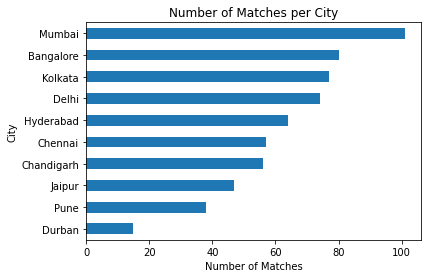

In [50]:
# Number of Matches per City

count_matches_in_city = matches_df["city"].value_counts()[:10].sort_values()
count_matches_in_city.plot(kind="barh")
plt.xlabel("Number of Matches")
plt.ylabel("City")
plt.title("Number of Matches per City")

Text(0.5, 1.0, 'Number of Toss Wins per Team')

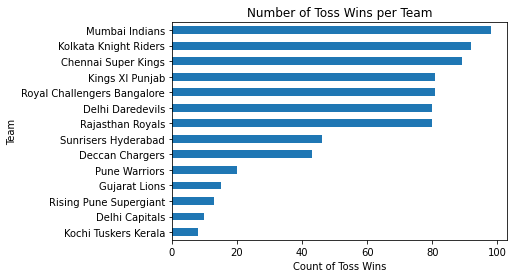

In [54]:
# most game toss_winner (value count plot)

count_toss_winner = matches_df["toss_winner"].value_counts().sort_values()
count_toss_winner.plot(kind="barh")
plt.xlabel("Count of Toss Wins")
plt.ylabel("Team")
plt.title("Number of Toss Wins per Team")

Text(0.5, 1.0, 'Common Toss Decisions after winning the Toss')

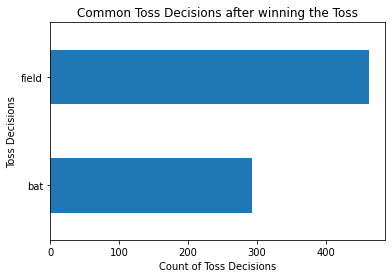

In [58]:
# most game toss_decision (value count plot)

count_toss_decision = matches_df["toss_decision"].value_counts().sort_values()
count_toss_decision.plot(kind="barh")
plt.xlabel("Count of Toss Decisions")
plt.ylabel("Toss Decisions")
plt.title("Common Toss Decisions after winning the Toss")

Text(0.5, 1.0, 'Number of Wins per Team')

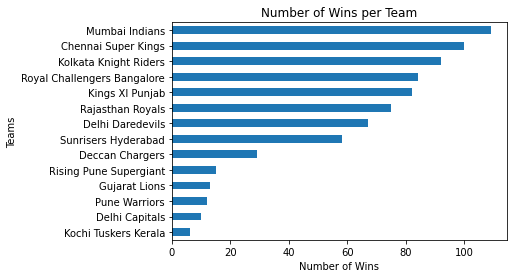

In [59]:
# most game winner  (value count plot)

count_team_winners = matches_df["winner"].value_counts().sort_values()
count_team_winners.plot(kind="barh")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.title("Number of Wins per Team")

Text(0.5, 1.0, 'Most number of Player of the Match awards per Player')

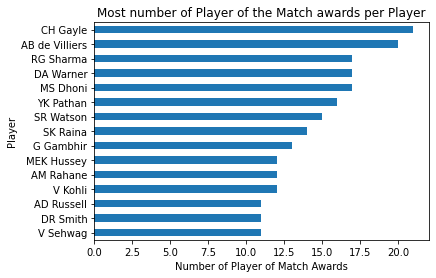

In [61]:
# most game player_of_match (value count plot)

count_player_of_match = matches_df["player_of_match"].value_counts()[:15].sort_values()
count_player_of_match.plot(kind="barh")
plt.xlabel("Number of Player of Match Awards")
plt.ylabel("Player")
plt.title("Most number of Player of the Match awards per Player")

In [64]:
# most margin win by runs (desc plot)


In [ ]:
# most margin win by wicket (desc plot)
